### Task 1 : Data cleaning

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt          
from tabulate import tabulate               
import matplotlib as mat                     
import seaborn as sns                    
import pandas as pd                         
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015


In [3]:

# Null Value Treatment
for column in df.columns:
    if df[column].isnull().sum() > 0:  # only treat if nulls are present
        if df[column].dtype == 'object':  # categorical
            mode_val = df[column].mode()[0]
            df[column].fillna(mode_val, inplace=True)
        else:  # numerical
            median_val = df[column].median()
            df[column].fillna(median_val, inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace=True)


In [4]:
df['is_canceled'].value_counts()

is_canceled
0    1416
1     459
Name: count, dtype: int64

### Task 2 : Booking pattern analysis


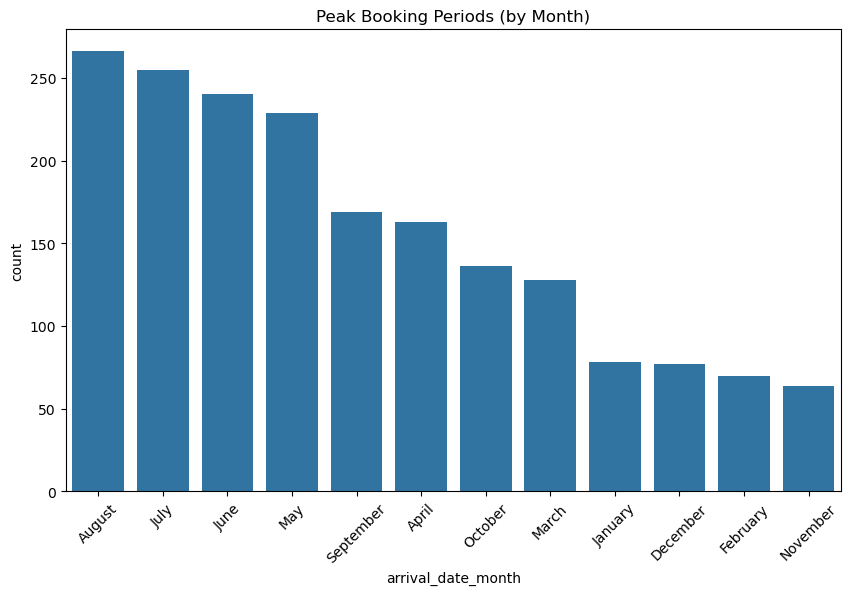

In [5]:
# i) Peak Booking Periods by Month
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='arrival_date_month', order=df['arrival_date_month'].value_counts().index)
plt.title('Peak Booking Periods (by Month)')
plt.xticks(rotation=45)
plt.show()
# August is the peak booking month.

is_canceled
0    61.408192
1    91.394336
Name: lead_time, dtype: float64


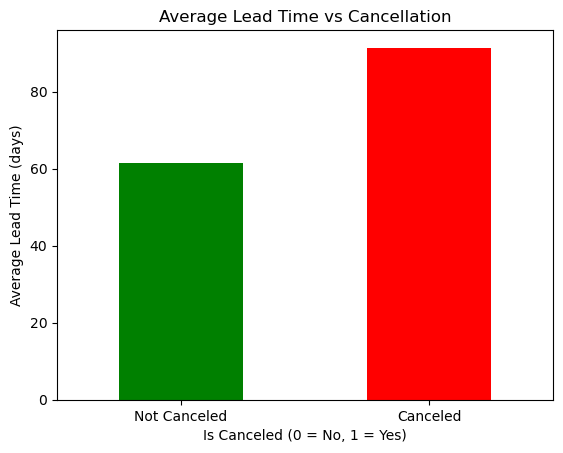

In [6]:
# ii) Plotting the average lead time for canceled vs non-canceled bookings
lead_time_mean = df.groupby('is_canceled')['lead_time'].mean()
print(lead_time_mean)
lead_time_mean.plot(kind='bar', color=['green', 'red'])
plt.title('Average Lead Time vs Cancellation')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Average Lead Time (days)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'], rotation=0)
plt.show()
# Chance of hotel getting cancelled increases with increase in lead time.

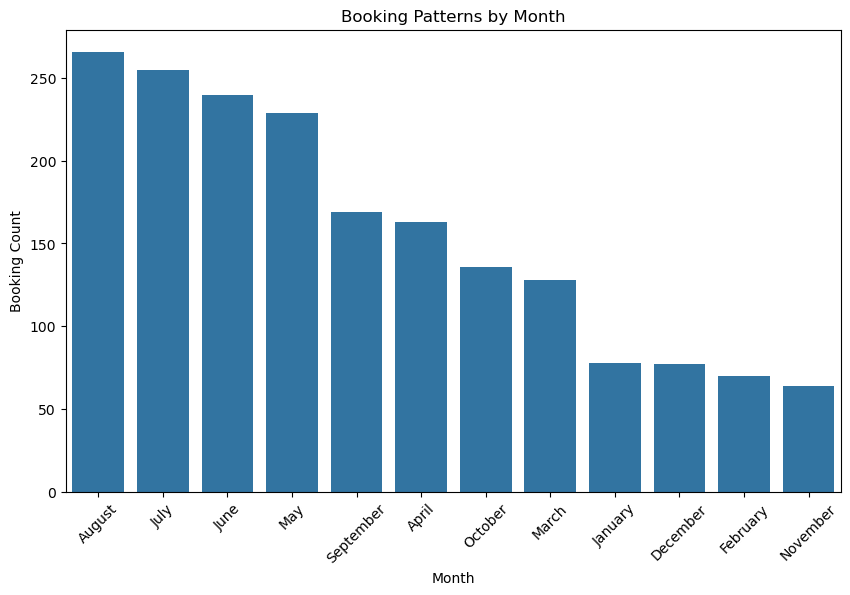

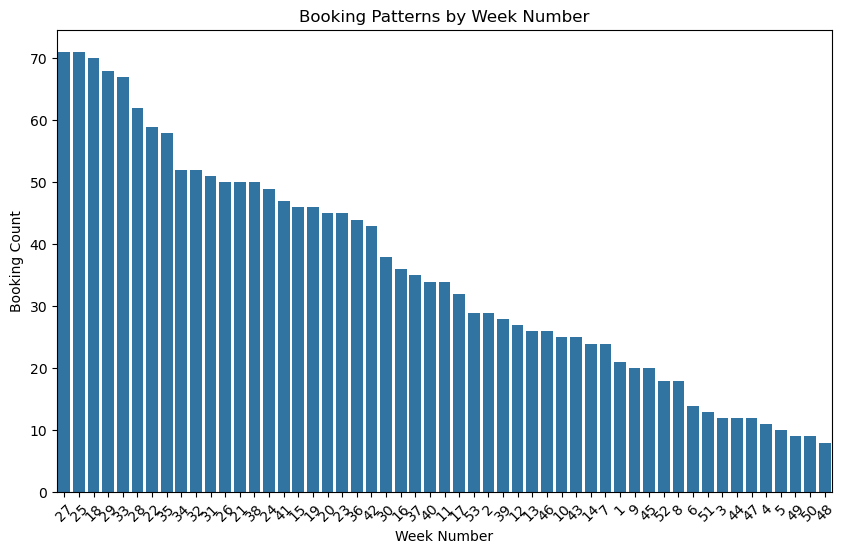

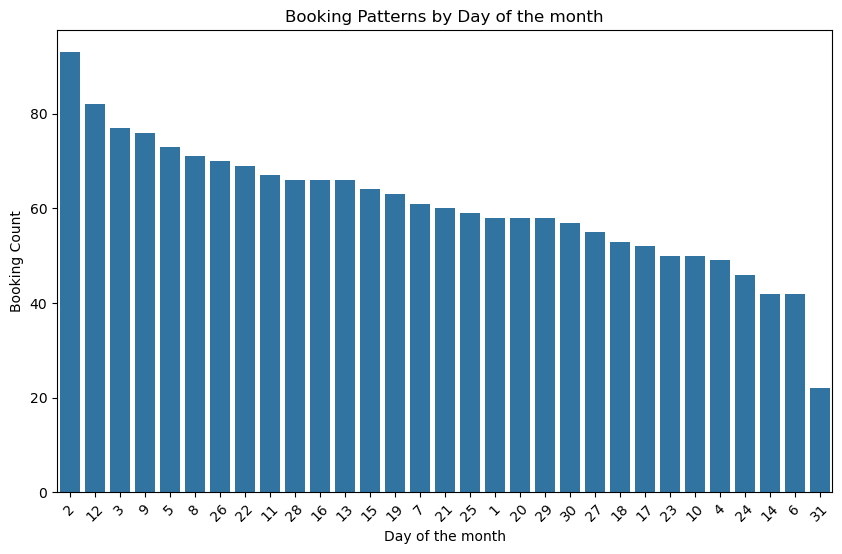

In [7]:
# iii) Booking patterns by Month
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='arrival_date_month', order=df['arrival_date_month'].value_counts().index)
plt.title('Booking Patterns by Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Booking Count')
plt.show()

# Booking patterns by Week Number
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='arrival_date_week_number', order=df['arrival_date_week_number'].value_counts().index)
plt.title('Booking Patterns by Week Number')
plt.xticks(rotation=45)
plt.xlabel('Week Number')
plt.ylabel('Booking Count')
plt.show()

# Booking patterns by Day of the Week
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='arrival_date_day_of_month', order=df['arrival_date_day_of_month'].value_counts().index)
plt.title('Booking Patterns by Day of the month')
plt.xticks(rotation=45)
plt.xlabel('Day of the month')
plt.ylabel('Booking Count')
plt.show()

### Task 3 : Booking Cancellation Analysis.

is_canceled
0    61.408192
1    91.394336
Name: lead_time, dtype: float64


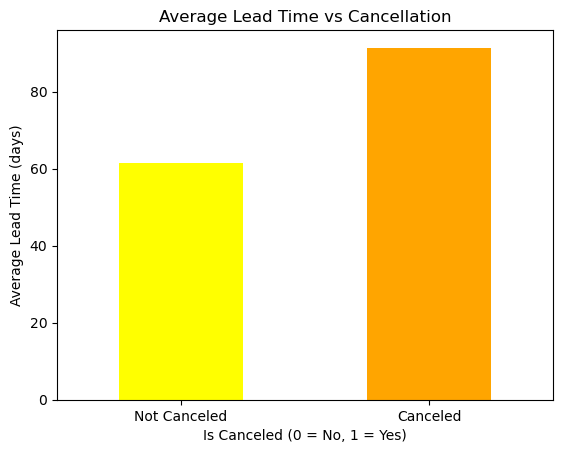

In [8]:
# i) Factors influencing Booking cancellation.

lead_time_mean = df.groupby('is_canceled')['lead_time'].mean()
print(lead_time_mean)
lead_time_mean.plot(kind='bar', color=['yellow', 'orange'])
plt.title('Average Lead Time vs Cancellation')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Average Lead Time (days)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'], rotation=0)
plt.show()
# Chance of hotel getting cancelled increases with increase in lead time.

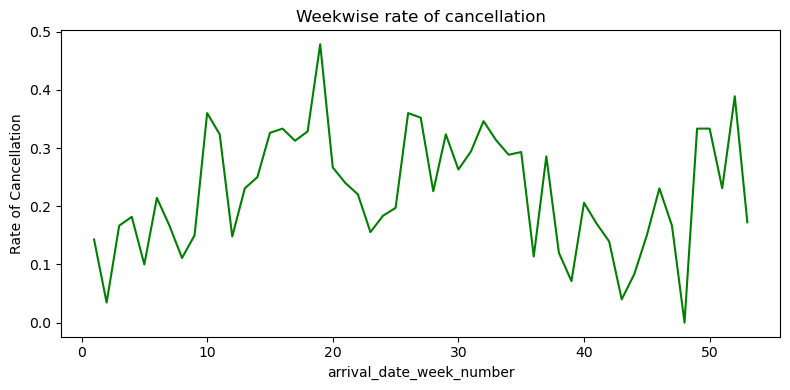

In [9]:
# ii) Pattern of cancellation over time.
plt.figure(figsize=(8,4))
df.groupby('arrival_date_week_number')['is_canceled'].mean().plot(color='green')
plt.title('Weekwise rate of cancellation')
plt.ylabel('Rate of Cancellation')
plt.tight_layout()
plt.show()
# There is no Specific Trend in cancellation pattern over time.
# But i can observe , in the 1st 20 weeks the graph seems to rise.
# Week 20-50 i can see a drop in rate of cancellation.

high_risk
0    1474
1     401
Name: count, dtype: int64


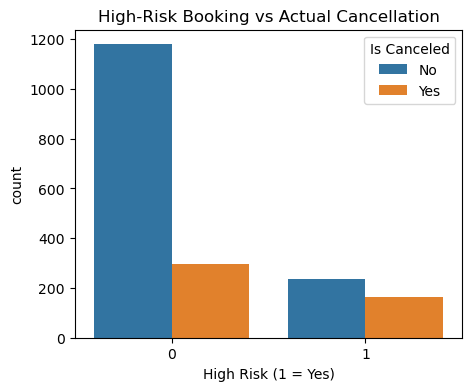

In [10]:
# Rule: lead_time > 100 days, deposit_type is 'No Deposit', customer_type is 'Transient'
df['high_risk'] = ((df['lead_time'] > 100) & 
                   (df['deposit_type'] == 'No Deposit') & 
                   (df['customer_type'] == 'Transient')).astype(int)

# Check counts
print(df['high_risk'].value_counts())

# Visualize
plt.figure(figsize=(5,4))
sns.countplot(x='high_risk', hue='is_canceled', data=df)
plt.title('High-Risk Booking vs Actual Cancellation')
plt.xlabel('High Risk (1 = Yes)')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()


In [11]:
# iii) High risk bookings
# Create a 'high_risk' column with "Yes"/"No" values
df['high_risk'] = (
    (df['lead_time'] > 100) &
    (df['deposit_type'] == 'No Deposit') &
    (df['customer_type'] == 'Transient') &
    (df['required_car_parking_spaces'] == 0)
).map({True: 'Yes', False: 'No'})

print('High risk booking')
df[df['high_risk'] == 'Yes']

High risk booking


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,high_risk
12,Resort Hotel,0,110,2015,July,31,28,2,8,2,...,6.0,197.0,0,Transient,90.95,0,1,Check-Out,07-08-2015,Yes
20,Resort Hotel,0,119,2015,September,39,23,0,2,2,...,241.0,197.0,0,Transient,56.98,0,1,Check-Out,25-09-2015,Yes
37,Resort Hotel,1,114,2016,July,30,21,1,3,2,...,240.0,197.0,0,Transient,240.00,0,0,Canceled,29-03-2016,Yes
38,Resort Hotel,1,114,2016,July,30,21,1,3,2,...,240.0,197.0,0,Transient,207.00,0,0,Canceled,29-03-2016,Yes
40,Resort Hotel,1,114,2016,July,30,21,2,3,2,...,240.0,197.0,0,Transient,240.00,0,0,Canceled,21-06-2016,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,City Hotel,0,169,2017,August,34,25,1,2,2,...,9.0,197.0,0,Transient,139.50,0,1,Check-Out,28-08-2017,Yes
2081,City Hotel,0,101,2017,August,35,27,1,0,2,...,9.0,197.0,0,Transient,166.00,0,2,Check-Out,28-08-2017,Yes
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,42.0,197.0,0,Transient,80.10,0,1,Check-Out,01-09-2017,Yes
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,14.0,197.0,0,Transient,117.00,0,1,Check-Out,03-09-2017,Yes


### Task 4 : Customer Behavioral segmentation

     customer_type   lead_time  total_of_special_requests reserved_room_type
0         Contract   40.277778                   1.388889                  A
1            Group   61.333333                   0.400000                  A
2        Transient   64.477273                   0.764354                  A
3  Transient-Party  114.429412                   0.700000                  A


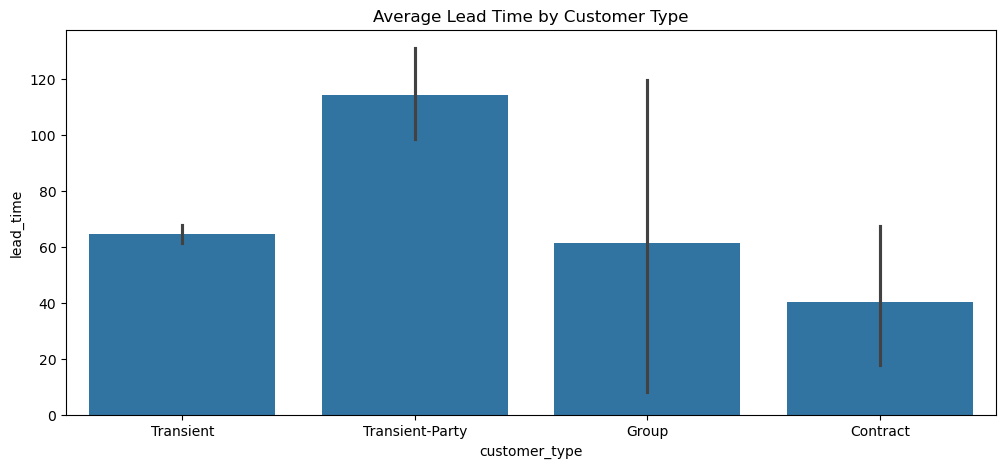

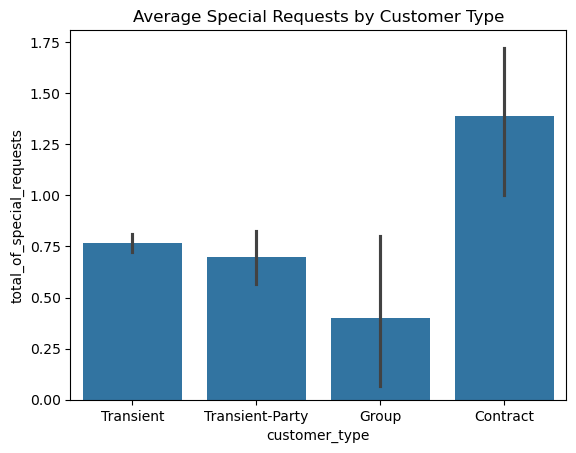

In [12]:
# 4 i)
# Grouping data by customer type
customer_behavior = df.groupby('customer_type').agg({
    'lead_time': 'mean',
    'total_of_special_requests': 'mean',
    'reserved_room_type': lambda x: x.value_counts().index[0]
}).reset_index()

print(customer_behavior)

# Visualize lead time and special requests by customer type
plt.figure(figsize=(12, 5))
sns.barplot(x='customer_type', y='lead_time', data=df)
plt.title('Average Lead Time by Customer Type')
plt.show()

sns.barplot(x='customer_type', y='total_of_special_requests', data=df)
plt.title('Average Special Requests by Customer Type')
plt.show()



Marketing Channel Effectiveness:
 market_segment
Online TA        1351
Direct            327
Offline TA/TO     111
Groups             57
Corporate          27
Complementary       1
Aviation            1
Name: count, dtype: int64


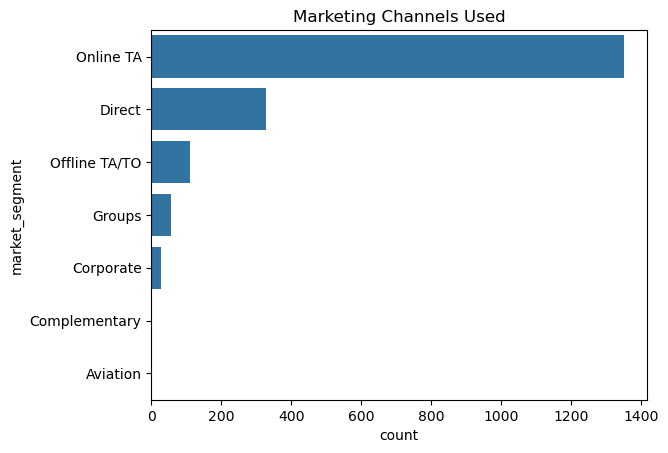

In [13]:
# ii) Find effective marketing channels
# Assuming column: 'market_segment'
channel_effectiveness = df['market_segment'].value_counts()
print("\nMarketing Channel Effectiveness:\n", channel_effectiveness)

sns.countplot(y='market_segment', data=df, order=channel_effectiveness.index)
plt.title('Marketing Channels Used')
plt.show()
# Most use market is Online TA, so we caan say it brings maximum customers.

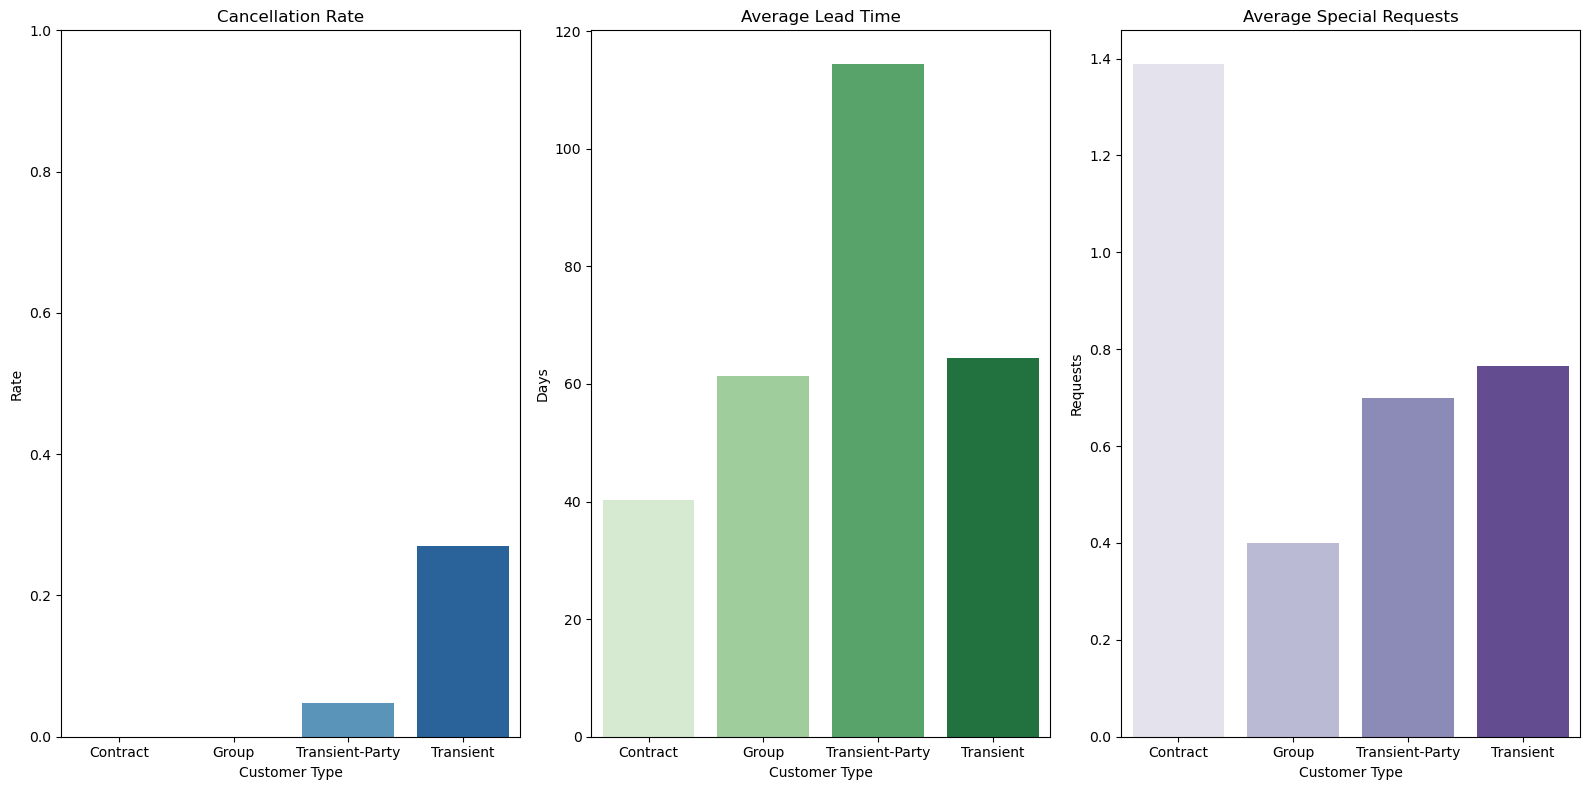

In [14]:
# iii)
# Cancellation Rate by Customer Type
cancellation_pattern = df.groupby('customer_type')['is_canceled'].mean().sort_values()

# Average Lead Time by Customer Type
lead_time_pattern = df.groupby('customer_type')['lead_time'].mean().reindex(cancellation_pattern.index)

# Average Special Requests by Customer Type
special_request_pattern = df.groupby('customer_type')['total_of_special_requests'].mean().reindex(cancellation_pattern.index)

# Visualization
plt.figure(figsize=(16,8))

# Cancellation Rate
plt.subplot(1,3,1)
sns.barplot(x=cancellation_pattern.index, y=cancellation_pattern.values, palette='Blues')
plt.title('Cancellation Rate', fontsize=12)
plt.ylabel('Rate')
plt.xlabel('Customer Type')
plt.ylim(0, 1)

# Avg Lead Time
plt.subplot(1,3,2)
sns.barplot(x=lead_time_pattern.index, y=lead_time_pattern.values, palette='Greens')
plt.title('Average Lead Time', fontsize=12)
plt.ylabel('Days')
plt.xlabel('Customer Type')

# Avg Special Requests
plt.subplot(1,3,3)
sns.barplot(x=special_request_pattern.index, y=special_request_pattern.values, palette='Purples')
plt.title('Average Special Requests', fontsize=12)
plt.ylabel('Requests')
plt.xlabel('Customer Type')

plt.tight_layout()
plt.show()

# Corporate customers have the lowest cancellation rate and moderate lead time — ideal for loyalty programs.

# Transient customers show higher cancellations but also make special requests — marketing can focus on flexibility and personalization for them.

# Lead time insights show that some customers book earlier — perfect for early-bird offers.

### Task 5 : Revenue Management

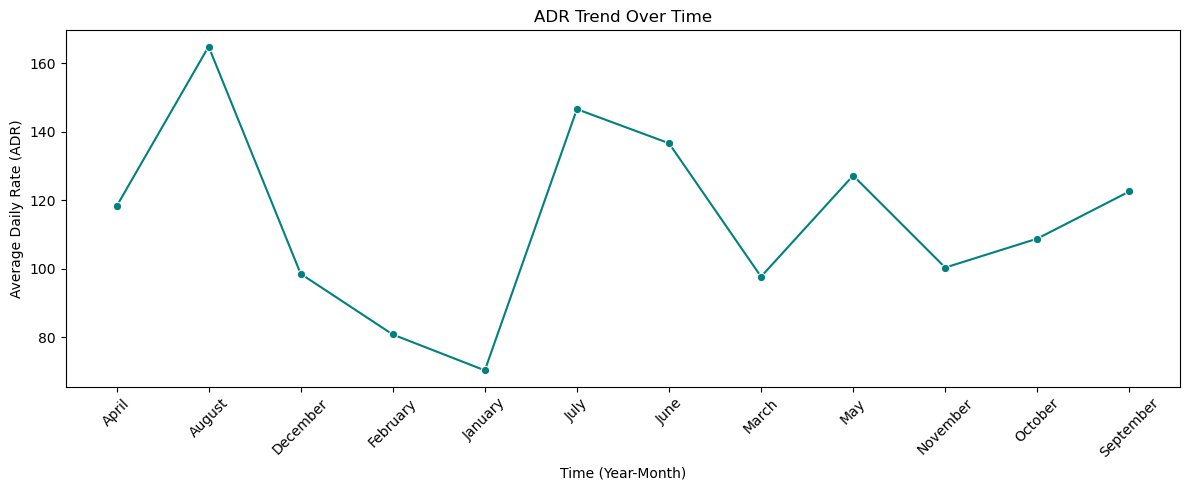

In [15]:
# i)
# Group by year and month and calculate average ADR
adr_trend = df.groupby('arrival_date_month')['adr'].mean().reset_index()

# Plot ADR trend
plt.figure(figsize=(12,5))
sns.lineplot(x='arrival_date_month', y='adr', data=adr_trend, marker='o', color='teal')
plt.title('ADR Trend Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

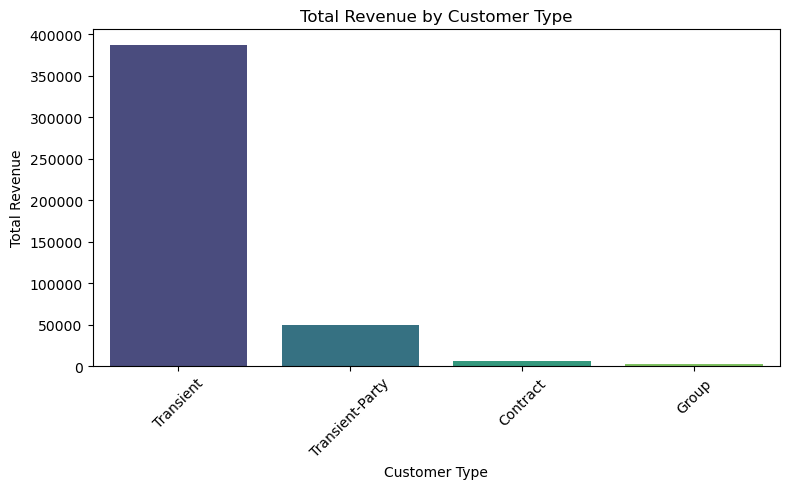

In [16]:
# ii)
# Calculate total nights stayed
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Calculate revenue (zero if canceled)
df['revenue'] = df['adr'] * df['total_nights'] * (1 - df['is_canceled'])

# Group revenue by customer type
revenue_by_customer = df.groupby('customer_type')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# Plot revenue by customer type
plt.figure(figsize=(8,5))
sns.barplot(x='customer_type', y='revenue', data=revenue_by_customer, palette='viridis')

plt.title('Total Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Now we can make stratigies according to customer type.
# we can give better offers / prices some complimentary services to 'group' as they are giving least revenue.

  reserved_room_type         adr
7                  H  225.505714
6                  G  199.620515
5                  F  179.651714
2                  C  174.397273
4                  E  153.283439
3                  D  134.853555
1                  B  106.539231
0                  A  104.263208


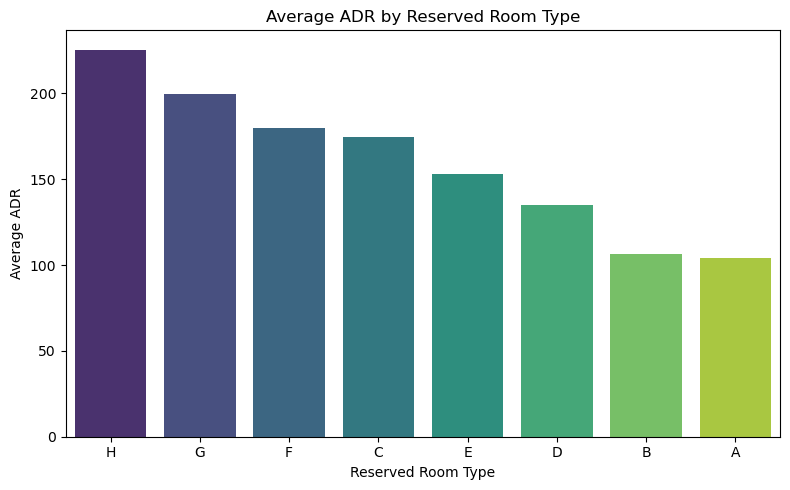

In [17]:
# iii)
# Step 1: Group by reserved room type and calculate average ADR
adr_per_room_type = df.groupby('reserved_room_type')['adr'].mean().reset_index()

# Step 2: Sort to see the highest ADR room type on top
adr_per_room_type = adr_per_room_type.sort_values(by='adr', ascending=False)

# Step 3: Print the result
print(adr_per_room_type)

# Step 4: Visualize using barplot
plt.figure(figsize=(8,5))
sns.barplot(x='reserved_room_type', y='adr', data=adr_per_room_type, palette='viridis')

# Enhancements
plt.title('Average ADR by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Average ADR')
plt.tight_layout()
plt.show()
# We can see room type 'H' is associated with higher 'ADR'.

### Task 6: Operational Efficiency


In [18]:
#i)
# Count total bookings per channel
channel_counts = df['distribution_channel'].value_counts().reset_index()
channel_counts.columns = ['distribution_channel', 'booking_count']
print(channel_counts)

# Calculate cancellation rate per channel
cancel_rate = df.groupby('distribution_channel')['is_canceled'].mean().reset_index()
cancel_rate.columns = ['distribution_channel', 'cancellation_rate']
print(cancel_rate)

# Optional: Average ADR per channel
adr_channel = df.groupby('distribution_channel')['adr'].mean().reset_index().sort_values(by='adr', ascending=False)
print(adr_channel)


  distribution_channel  booking_count
0                TA/TO           1495
1               Direct            326
2            Corporate             33
3                  GDS             21
  distribution_channel  cancellation_rate
0            Corporate           0.000000
1               Direct           0.122699
2                  GDS           0.571429
3                TA/TO           0.272241
  distribution_channel         adr
1               Direct  140.767546
2                  GDS  136.801429
3                TA/TO  122.718716
0            Corporate  102.665455


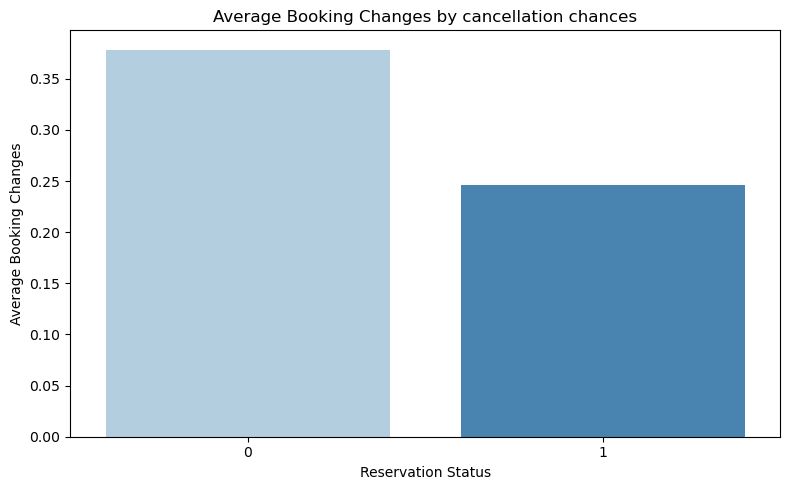

In [19]:
# ii) Affect of Booking changes on hotel operation
# Calculate average booking changes per reservation status
avg_changes = df.groupby('is_canceled')['booking_changes'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='is_canceled', y='booking_changes', data=avg_changes, palette='Blues')

plt.title('Average Booking Changes by cancellation chances')
plt.xlabel('Reservation Status')
plt.ylabel('Average Booking Changes')
plt.tight_layout()
plt.show()
# WE can see lesser changes made on a booking get cancelled easily

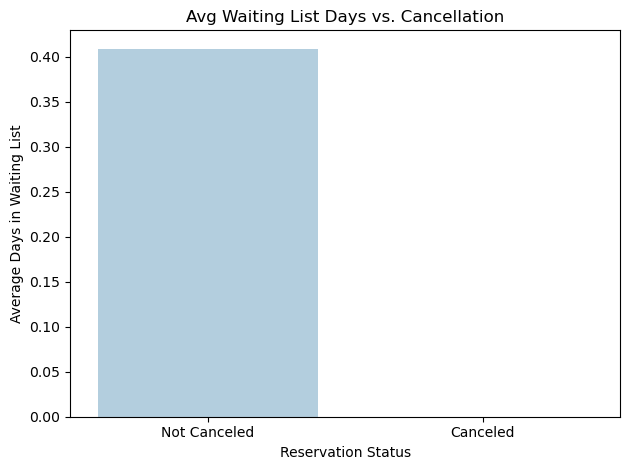

Correlation between waiting list duration and cancellation:
-0.030925929713785407


In [20]:
# iii)
# Group by cancellation status and calculate average waiting days
waiting_avg = df.groupby('is_canceled')['days_in_waiting_list'].mean().reset_index()
waiting_avg['is_canceled'] = waiting_avg['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})

# Plot
sns.barplot(x='is_canceled', y='days_in_waiting_list', data=waiting_avg, palette='Blues')
plt.title('Avg Waiting List Days vs. Cancellation')
plt.xlabel('Reservation Status')
plt.ylabel('Average Days in Waiting List')
plt.tight_layout()
plt.show()

# Optional: Pearson correlation
print("Correlation between waiting list duration and cancellation:")
print(df['days_in_waiting_list'].corr(df['is_canceled']))

### Task 7 : Loyalty Programs and repeat Business.

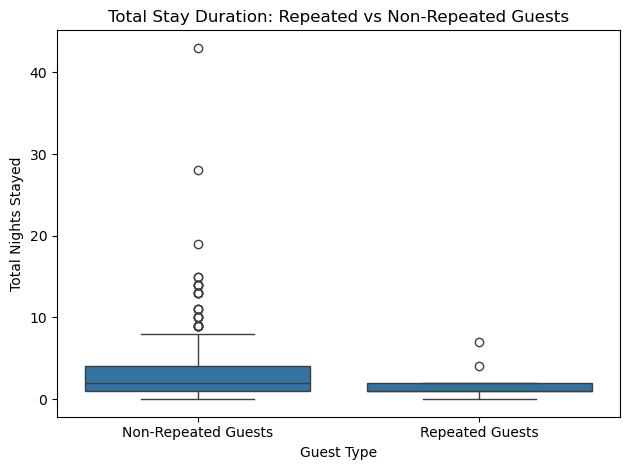

In [21]:
# i) Compare stay durations for repeated vs non-repeated guests.
# Add a column for total stay duration
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Boxplot to compare total stay duration
sns.boxplot(x='is_repeated_guest', y='total_stay_nights', data=df)
plt.xticks([0, 1], ['Non-Repeated Guests', 'Repeated Guests'])
plt.title('Total Stay Duration: Repeated vs Non-Repeated Guests')
plt.xlabel('Guest Type')
plt.ylabel('Total Nights Stayed')
plt.tight_layout()
plt.show()

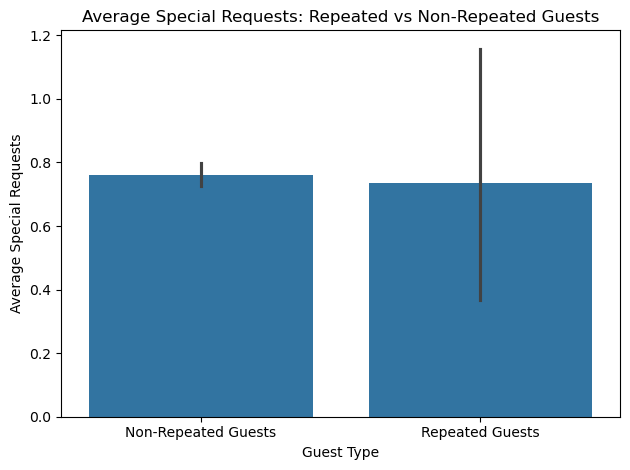

In [22]:
# ii) Success of loyalty programs vs special requests
# Barplot of average special requests by guest type
sns.barplot(x='is_repeated_guest', y='total_of_special_requests', data=df)
plt.xticks([0, 1], ['Non-Repeated Guests', 'Repeated Guests'])
plt.title('Average Special Requests: Repeated vs Non-Repeated Guests')
plt.xlabel('Guest Type')
plt.ylabel('Average Special Requests')
plt.tight_layout()
plt.show()


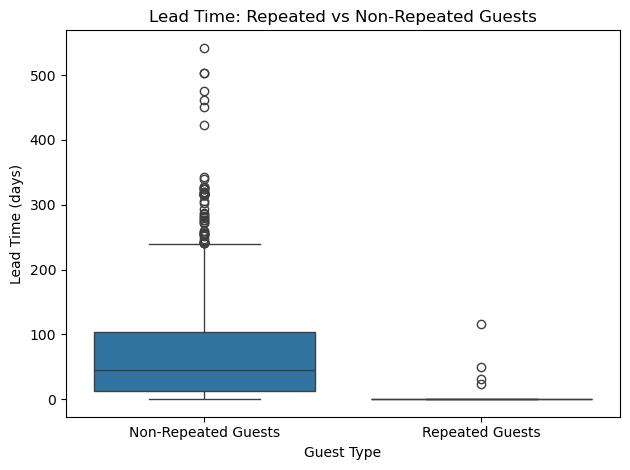

In [23]:
# iii) Factors contributing to repeat business — Lead Time
# Goal: Compare booking lead time between repeated and non-repeated guests.

# Boxplot of lead time distribution
sns.boxplot(x='is_repeated_guest', y='lead_time', data=df)
plt.xticks([0, 1], ['Non-Repeated Guests', 'Repeated Guests'])
plt.title('Lead Time: Repeated vs Non-Repeated Guests')
plt.xlabel('Guest Type')
plt.ylabel('Lead Time (days)')
plt.tight_layout()
plt.show()
